## Importing libraries

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

pd.options.mode.chained_assignment = None

In [69]:
# Now we need to read in the data.
df = pd.read_csv(r'C:\Users\HP\Desktop\Data Analysis Project\movies.csv')

In [70]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


## Cleaning data

In [71]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.0%
gross - 2.0%
company - 0.0%
runtime - 0.0%


In [72]:
df.median(axis = 0, skipna = True)


year           2000.0
score             6.5
votes         33000.0
budget     20500000.0
gross      20205757.0
runtime         104.0
dtype: float64

In [73]:
df['budget'].fillna(value=20500000.0,inplace=True)

In [74]:
df['gross'].fillna(value=20205757.0,inplace=True)

In [75]:
df.dropna(axis=0,inplace=True)

In [76]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000.0,461421559.0,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,20500000.0,3661.0,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,20500000.0,413378.0,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000.0,20205757.0,Notis Studio,78.0


In [77]:
df.rating.unique()

array(['R', 'PG', 'G', 'Not Rated', 'NC-17', 'Approved', 'TV-PG', 'PG-13',
       'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [108]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [79]:
# Change data type of columns.

df['budget'] = df['budget'].astype('int64')

df['gross']=df['gross'].astype('int64')

In [80]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,The Eight Hundred,Not Rated,Action,2020,"August 28, 2020 (United States)",6.8,3700.0,Hu Guan,Hu Guan,Zhi-zhong Huang,China,80000000,461421559,Beijing Diqi Yinxiang Entertainment,149.0
7653,The Quarry,R,Crime,2020,"April 17, 2020 (Mexico)",5.4,2400.0,Scott Teems,Scott Teems,Shea Whigham,United States,20500000,3661,Prowess Pictures,98.0
7656,Tulsa,PG-13,Comedy,2020,"June 3, 2020 (United States)",5.0,294.0,Scott Pryor,Scott Pryor,Scott Pryor,United States,20500000,413378,Pryor Entertainment,120.0
7658,Black Wall Street Burning,R,Drama,2020,"February 7, 2020 (United States)",6.6,35.0,Marcus Brown,Dekoven Riggins,Dan Belcher,United States,5000,20205757,Notis Studio,78.0


In [81]:
# Order our Data a little bit to see.

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,I Want You,R,Crime,1998,"October 30, 1998 (United Kingdom)",6.1,2900.0,Michael Winterbottom,Eoin McNamee,Rachel Weisz,United Kingdom,20500000,1672,Polygram Filmed Entertainment,87.0
2906,Pusher,Not Rated,Crime,1996,"August 30, 1996 (Denmark)",7.4,37000.0,Nicolas Winding Refn,Jens Dahl,Kim Bodnia,Denmark,20500000,1605,Balboa Entertainment,110.0
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,20500000,1400,British Broadcasting Corporation (BBC),103.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,20500000,682,Roxwell Films,93.0


In [90]:
pd.set_option('display.max_rows',None)

In [134]:
# Dropping the duplicate values.

df.drop_duplicates(inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7574 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7574 non-null   object 
 1   rating    7574 non-null   object 
 2   genre     7574 non-null   object 
 3   year      7574 non-null   int64  
 4   released  7574 non-null   object 
 5   score     7574 non-null   float64
 6   votes     7574 non-null   float64
 7   director  7574 non-null   object 
 8   writer    7574 non-null   object 
 9   star      7574 non-null   object 
 10  country   7574 non-null   object 
 11  budget    7574 non-null   int64  
 12  gross     7574 non-null   int64  
 13  company   7574 non-null   object 
 14  runtime   7574 non-null   float64
dtypes: float64(3), int64(3), object(9)
memory usage: 946.8+ KB


# Finding Correlation 

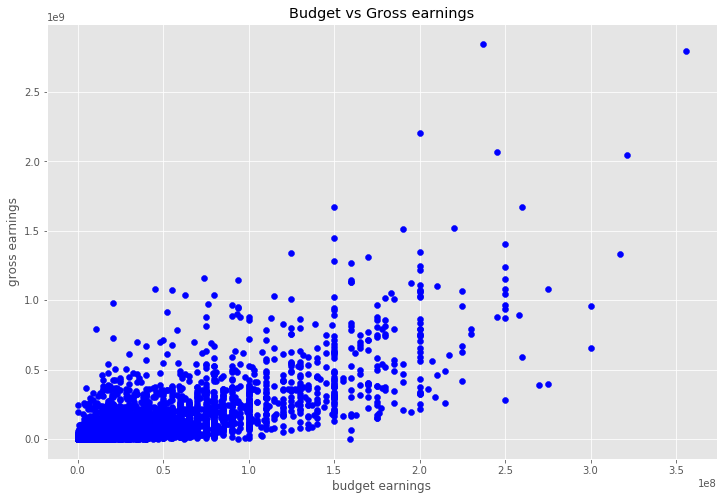

In [136]:
# Scatter plot for budget vs gross.

plt.scatter(x=df['budget'],y=df['gross'],color='blue')

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for film')

plt.ylabel('Gross Earnings')

plt.show()

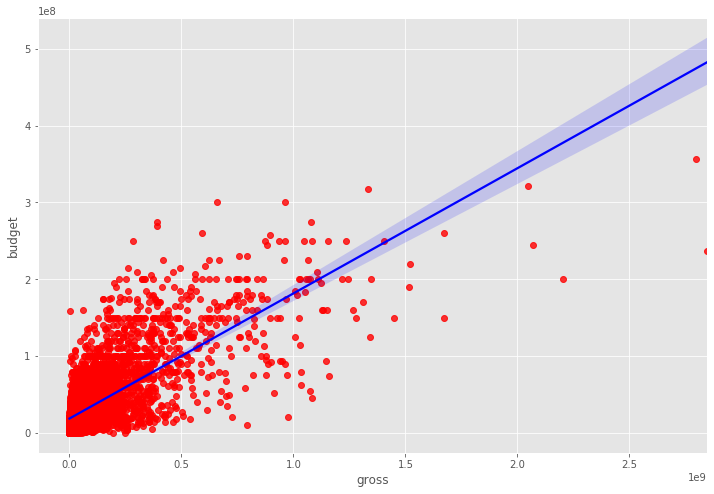

In [143]:
# Plot budget vs gross using seaborn.


sns.regplot(x="gross", y="budget", data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [152]:
# Lets start looking at correlation.

df.corr(method='pearson') #pearson(default), kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.102346,0.226895,0.296131,0.262150,0.120676
score,0.102346,1.000000,0.411931,0.062535,0.187523,0.400574
votes,0.226895,0.411931,1.000000,0.460066,0.632332,0.309366
budget,0.296131,0.062535,0.460066,1.000000,0.746373,0.273902
gross,0.262150,0.187523,0.632332,0.746373,1.000000,0.244201
runtime,0.120676,0.400574,0.309366,0.273902,0.244201,1.000000


## High correlation between budget and gross.

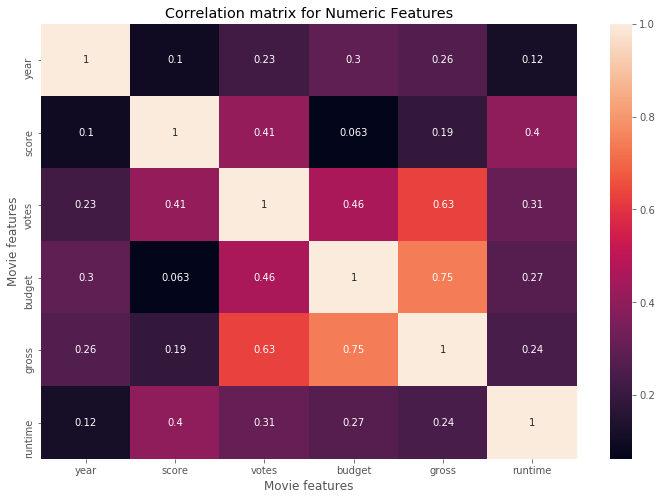

In [156]:
correlation_matrix= df.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation matrix for Numeric Features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [169]:
# Changing 'object' data type into 'category' using cat.codes to analyze correlation among all columns.

df_categorized=df

for col_name in df_categorized.columns:
    if(df_categorized[col_name].dtype == 'object'):
        
        df_categorized[col_name] = df_categorized[col_name].astype('category')
        df_categorized[col_name] = df_categorized[col_name].cat.codes
df_categorized.head()      

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6506,6,6,1980,1685,8.4,927000.0,2544,3958,1022,54,19000000,46998772,2273,146.0
1,5498,6,1,1980,1472,5.8,65000.0,2233,1612,316,55,4500000,58853106,710,104.0
2,5073,4,0,1980,1751,8.7,1200000.0,1093,2534,1708,55,18000000,538375067,1505,124.0
3,282,4,4,1980,1472,7.7,221000.0,1279,1975,2197,55,3500000,83453539,1769,88.0
4,1016,6,4,1980,1523,7.3,108000.0,1037,511,398,55,6000000,39846344,1736,98.0


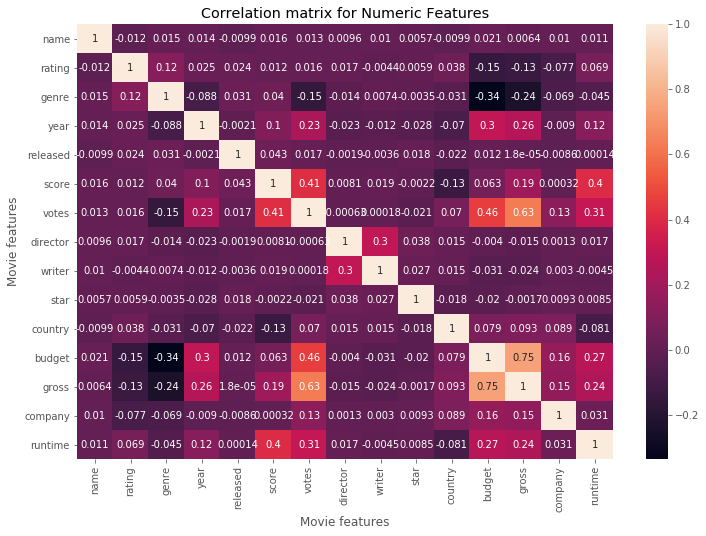

In [162]:
correlation_matrix= df_categorized.corr(method='pearson')

sns.heatmap(correlation_matrix,annot=True)

plt.title('Correlation matrix for Numeric Features')

plt.xlabel('Movie features')

plt.ylabel('Movie features')

plt.show()

In [172]:
corr_pairs = df_categorized.corr().unstack()


In [171]:
sorted_pairs = corr_pairs.sort_values()


In [168]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross     votes       0.632332
votes     gross       0.632332
gross     budget      0.746373
budget    gross       0.746373
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# votes and budget have highest correlation to gross earnings.